# Prosper Loan Data 
## by Emmanuel Igwe

## Introduction
> Introduce the dataset

Approximately 114,000 rows of loan data are examined in this document, including the loan amount, borrower income (stated monthly income), debt-to-income ratio, loan term, Prosper score, and a number of other variables.

[Learn more about prosper loan variables here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) for better understandind of varibles used in the dataset




## Preliminary Wrangling


In [66]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

### Data gatharing

I directly downloaded the prosperloandata from udacity(prosperloanData.csv)

In [ ]:
#read prosperLoanData

In [3]:
prosperLoanData = pd.read_csv('prosperLoanData.csv')


### Data Assessment

In [10]:
# inspecting the dataset and getting the shape of dataframe

In [8]:
print(prosperLoanData.shape)
prosperLoanData.head(3)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [12]:
# inspecting the tail pf the prosperoan dataframe

In [11]:
prosperLoanData.tail(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [13]:
# inspecting the columns of the dataframe

In [6]:
prosperLoanData.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [ ]:
# making a copy of the dataframe

In [14]:
prosperLoanData_clean = prosperLoanData.copy()

In [16]:
#inspecting the copied dataframe

In [17]:
prosperLoanData_clean.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [27]:
prosperLoanData_clean.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

### subseting the data

I would like to pick the columns i would need for analysis in general

In [22]:
prosperLoanData_sub = prosperLoanData_clean[['ListingNumber','Term', 'LoanStatus', 'IncomeRange',
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
             'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment',]]

In [24]:
# inspecting the dataframe subset which i would be using for analysis

In [25]:
prosperLoanData_sub.head(3)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,36,Completed,Not displayed,NaN,NaN,0,GA,Other,Not available,NaN,0.06,False,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32


In [ ]:
# overview pf the data and shape

In [26]:
print(prosperLoanData_sub.shape)
print(prosperLoanData_sub.dtypes)

(113937, 18)
ListingNumber                  int64
Term                           int64
LoanStatus                    object
IncomeRange                   object
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
EmploymentStatusDuration     float64
DebtToIncomeRatio            float64
IsBorrowerHomeowner             bool
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationDate           object
LoanOriginationQuarter        object
MonthlyLoanPayment           float64
dtype: object


In [28]:
# Getting a concise summary of data
prosperLoanData_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   IncomeRange                113937 non-null  object 
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ProsperScore               84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   BorrowerState              108422 non-null  object 
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  EmploymentStatusDuration   106312 non-null  float64
 11  DebtToIncomeRatio          105383 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  StatedMonthlyIncome        11

In [29]:
# Checking nulls values in dataaset
prosperLoanData_sub.isnull().sum()

ListingNumber                    0
Term                             0
LoanStatus                       0
IncomeRange                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
DebtToIncomeRatio             8554
IsBorrowerHomeowner              0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
dtype: int64

In [30]:
# Checking for duplicates
prosperLoanData_sub.duplicated().sum()

0

In [31]:
# Getting count of unique values in LoanStatus Column
prosperLoanData_sub.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [33]:
# getting unique values in the prosperity rating column

In [32]:
prosperLoanData_sub['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [35]:
# inspecting for missing values in the prosperity rating column

In [34]:
prosperLoanData_sub['ProsperRating (Alpha)'].isnull().sum()

29084

In [37]:
#getting unique count values in the employment status column
prosperLoanData_sub.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [36]:
# Getting count of unique values in ListingCategory Column
prosperLoanData_sub['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [38]:
# Getting count of unique values in IsBorrowerHomeowner Column
prosperLoanData_sub.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [39]:
# getting unique count in the prosperscore column
prosperLoanData_sub.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [40]:
# Getting count of unique values in StatedMonthlyIncome Column
prosperLoanData_sub.StatedMonthlyIncome .value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

### Assessments

quallity issues


1. Missing values in ProsperRating(Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration columns.
2. Rounding StatedMonthlyIncome to 2 dp ()
3. Replace True with 'Home Owner' and false with 'Not Home Owner' then change datatype to categorical
4. Filling missing values in Occupation column with None Given
5. converting loan original date column to datetime datatype
6. Replace the numbers 1,2... with January, Febuary, ... in loan original month column
2. Convert Listing category from numeric to Categorical datatype
3. Listing Number tostring, LoanOriginationDate to Datetime (extract year, month, day and time Loan originated), LoanStatus from string to categorical, ProsperRating(Alpha) and ProsperScore from string to Categorical datatype, ListingCategory from int to ordered Categorical datatype, IncomeRange from int to Ordered Categorical datatype, EmploymentStatus from string to Categorical



In [42]:
# copying the data in prosperloandata to df_prosper_claen

In [41]:
df_prosperLoan_clean = prosperLoanData_sub.copy()

In [45]:
# inspecting the df_prosperloan_clean dataset

In [44]:
df_prosperLoan_clean.head(2)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### Data cleaning

#### Define

1. Missing values in ProsperRating(Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration columns.

#### Code

In [46]:
# Filtering to get only rows where the Prosper rating is not null (this is an important factor in assessing risk level of loans)
df_prosperLoan_clean = df_prosperLoan_clean[df_prosperLoan_clean['ProsperRating (Alpha)'].notnull()]

In [48]:
#filtering to get rows where dept to income ratio is not null

In [47]:
df_prosperLoan_clean = df_prosperLoan_clean[df_prosperLoan_clean['DebtToIncomeRatio'].notnull()]

In [50]:
#filtering to get rows where employment status duration is not null

In [49]:
df_prosperLoan_clean = df_prosperLoan_clean[df_prosperLoan_clean['EmploymentStatusDuration'].notnull()]

#### Test

In [52]:
# inspecting to see id the proper rating column contain no null

In [51]:
df_prosperLoan_clean['ProsperRating (Alpha)'].isnull().sum()

0

In [54]:
# inspecting to see that the dept to income ratio contains no null values

In [53]:
df_prosperLoan_clean['DebtToIncomeRatio'].isnull().sum()

0

In [56]:
# inspecting to see that the employment status duration contains no null values

In [55]:
df_prosperLoan_clean['EmploymentStatusDuration'].isnull().sum()

0

#### Define

 2 . Rounding StatedMonthlyIncome to 2 dp ()

#### Code

In [57]:
# Rounding StatedMonthlyIncome to 2 dp ()
df_prosperLoan_clean.StatedMonthlyIncome = df_prosperLoan_clean.StatedMonthlyIncome.round(decimals=0)
df_prosperLoan_clean.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.0,10000,2014-03-03 00:00:00,Q1 2014,318.93
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.0,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.0,15000,2013-09-20 00:00:00,Q3 2013,563.97
5,1074836,60,Current,"$100,000+",B,10.0,1,NM,Professional,Employed,82.0,0.36,True,8333.0,15000,2013-12-24 00:00:00,Q4 2013,342.37
6,750899,36,Current,"$25,000-49,999",E,2.0,1,KS,Sales - Retail,Employed,172.0,0.27,False,2083.0,3000,2013-04-18 00:00:00,Q2 2013,122.67


#### Test

In [59]:
# inspecting the stated monthly income column

In [58]:
df_prosperLoan_clean.StatedMonthlyIncome.value_counts()

4167.0     2429
5000.0     2307
3333.0     1916
5833.0     1830
5417.0     1770
           ... 
8653.0        1
36250.0       1
1602.0        1
2166.0        1
18756.0       1
Name: StatedMonthlyIncome, Length: 6255, dtype: int64

#### Define

3. Replace True with 'Home Owner' and false with 'Not Home Owner' then change datatype to categorical

#### Code

In [60]:
# Converting boolean to string
df_prosperLoan_clean.IsBorrowerHomeowner = df_prosperLoan_clean.IsBorrowerHomeowner.map({True: 'True', False: 'False'}) 
# Replace True with Home Owner and False, with Not Home Owner
df_prosperLoan_clean.IsBorrowerHomeowner.replace('True', 'Home Owner', inplace=True)
df_prosperLoan_clean.IsBorrowerHomeowner.replace('False', 'Not Home Owner', inplace=True)

#### Test

In [62]:
df_prosperLoan_clean.IsBorrowerHomeowner.value_counts()

Home Owner        42058
Not Home Owner    35485
Name: IsBorrowerHomeowner, dtype: int64

#### Define

4. Filling missing values in Occupation column with None Given

#### Code

In [63]:
# Filling missing values in Occupation column with None Given
df_prosperLoan_clean.Occupation = df_prosperLoan_clean.Occupation.fillna('None Given')

#### Test

In [65]:
#inspecting the occupation column

In [64]:
df_prosperLoan_clean.Occupation.isnull().sum()

0

#### Define

5. converting loan original date column to datetime datatype

#### Code

In [67]:
df_prosperLoan_clean.LoanOriginationDate = pd.to_datetime(df_prosperLoan_clean.LoanOriginationDate)

In [68]:
df_prosperLoan_clean['LoanOriginationYear'] = df_prosperLoan_clean['LoanOriginationDate'].dt.year
df_prosperLoan_clean['LoanOriginationMonth'] = df_prosperLoan_clean['LoanOriginationDate'].dt.month
df_prosperLoan_clean['LoanOriginationTime'] = df_prosperLoan_clean['LoanOriginationDate'].dt.time

#### Test

In [69]:
df_prosperLoan_clean.dtypes

ListingNumber                         int64
Term                                  int64
LoanStatus                           object
IncomeRange                          object
ProsperRating (Alpha)                object
ProsperScore                        float64
ListingCategory (numeric)             int64
BorrowerState                        object
Occupation                           object
EmploymentStatus                     object
EmploymentStatusDuration            float64
DebtToIncomeRatio                   float64
IsBorrowerHomeowner                  object
StatedMonthlyIncome                 float64
LoanOriginalAmount                    int64
LoanOriginationDate          datetime64[ns]
LoanOriginationQuarter               object
MonthlyLoanPayment                  float64
LoanOriginationYear                   int64
LoanOriginationMonth                  int64
LoanOriginationTime                  object
dtype: object

In [70]:
# Drop LoanOriginationDateColumn
df_prosperLoan_clean = df_prosperLoan_clean.drop(['LoanOriginationDate'], axis=1)

#### Define

6. Replace the numbers 1,2... with January, Febuary, ... in loan original month

#### Code

In [71]:
# Replace the numbers 1,2... with January, Febuary, ...
df_prosperLoan_clean ['LoanOriginationMonth'] = df_prosperLoan_clean ['LoanOriginationMonth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
        ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'])

#### Test

In [72]:
df_prosperLoan_clean.LoanOriginationMonth.value_counts()

January      8468
October      8096
December     8078
November     7444
Febuary      7127
September    6314
August       6082
July         5803
March        5471
June         5415
May          4856
April        4389
Name: LoanOriginationMonth, dtype: int64

In [73]:
df_prosperLoan_clean.LoanOriginationYear.value_counts()

2013    32171
2012    17477
2014    11267
2011     9924
2010     4919
2009     1785
Name: LoanOriginationYear, dtype: int64

#### Define

#### Code

In [74]:
# Convert LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_prosperLoan_clean[var] = df_prosperLoan_clean[var].astype(ordered_var)

In [75]:
# Converting to right datatypes
df_prosperLoan_clean.ListingNumber = df_prosperLoan_clean.ListingNumber.astype(str)

In [76]:
df_prosperLoan_clean['ListingCategory (numeric)'] = df_prosperLoan_clean['ListingCategory (numeric)'].astype('category')

In [77]:
df_prosperLoan_clean.IsBorrowerHomeowner = df_prosperLoan_clean.IsBorrowerHomeowner.astype('category')

In [78]:
df_prosperLoan_clean.EmploymentStatus = df_prosperLoan_clean.EmploymentStatus.astype('category')

#### Test

In [79]:
df_prosperLoan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              77543 non-null  object  
 1   Term                       77543 non-null  int64   
 2   LoanStatus                 77543 non-null  category
 3   IncomeRange                77543 non-null  category
 4   ProsperRating (Alpha)      77543 non-null  category
 5   ProsperScore               77543 non-null  category
 6   ListingCategory (numeric)  77543 non-null  category
 7   BorrowerState              77543 non-null  object  
 8   Occupation                 77543 non-null  object  
 9   EmploymentStatus           77543 non-null  category
 10  EmploymentStatusDuration   77543 non-null  float64 
 11  DebtToIncomeRatio          77543 non-null  float64 
 12  IsBorrowerHomeowner        77543 non-null  category
 13  StatedMonthlyIncome        775

In [81]:
# Saving to a csv file
df_prosperLoan_clean.to_csv('UpdatedLoanData.csv')

In [82]:
df_loan =  pd.read_csv('UpdatedLoanData.csv')

## Overview of Subset dataframe

In [84]:
df_loan.head(2)

,Unnamed: 0,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,...,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
0,1,1209647,36,Current,"$50,000-74,999",A,7,2,CO,Professional,...,44.0,0.18,Not Home Owner,6125.0,10000,Q1 2014,318.93,2014,March,00:00:00
1,3,658116,36,Current,"$25,000-49,999",A,9,16,GA,Skilled Labor,...,113.0,0.15,Home Owner,2875.0,10000,Q4 2012,321.45,2012,November,00:00:00


In [86]:
df_loan.columns

Index(['Unnamed: 0', 'ListingNumber', 'Term', 'LoanStatus', 'IncomeRange',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LoanOriginationYear', 'LoanOriginationMonth',
       'LoanOriginationTime'],
      dtype='object')

In [85]:
# Overview of data shape and composition
print(df_loan.shape)
print(df_loan.dtypes)


(77543, 21)
Unnamed: 0                     int64
ListingNumber                  int64
Term                           int64
LoanStatus                    object
IncomeRange                   object
ProsperRating (Alpha)         object
ProsperScore                   int64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
EmploymentStatusDuration     float64
DebtToIncomeRatio            float64
IsBorrowerHomeowner           object
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationQuarter        object
MonthlyLoanPayment           float64
LoanOriginationYear            int64
LoanOriginationMonth          object
LoanOriginationTime           object
dtype: object


### Data visualizations

## Reports

### What is the structure of your dataset?


There are 74,543 Prosper Loan listings information in the dataset with 21 variables 
[for more informantion about the data set see here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

Some variables are numerical, others categorical.

The variables below are ordered Categorical variables with the following levels.

LoanStatus: 'Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress' ,'Past Due (1-15 days)', Past Due (16-30 days), 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)', 'Past Due (>120 days)']
ProsperRating (Alpha) : 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'
ProsperScore : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
IncomeRange : Not displayed, Not employed, 1-24,999, 50,000-74,999, 100,000+

ListingCreationMonth : 'January','Febuary', 'March','April','May','June','July','August','September', 'October','November','December'
ListingCreationYear : 2009, 2010, 2011, 2012, 2013, 2014


### What is/are the main feature(s) of interest in your dataset?


I'm interested in figuring out what determines the maximum Loan Amount to be given out to a Borrower?
and also how the prosper rating influence the amount of loan given to the borrower

Main Feature of interest: LoanOriginalAmount in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The loan original amount will, in my opinion, be most strongly influenced by StatedMonthlyIncome: the higher the income, the larger the loan original amount. The Debt-to-Income Ratio, Loan Term, and Prosper risk score, in my opinion, will also have an impact on the Loan Original Amount.

Owning a property should increase the Loan Original Amount, in my opinion.

## Univariate Exploration

 


### Question 1

I want to know how the distribution of one of my major interest  "LoanOriginalAmount," looks.

### visualization

In [87]:
#Selecting one color from seaborn's color palette
base_color = sb.color_palette()[0]

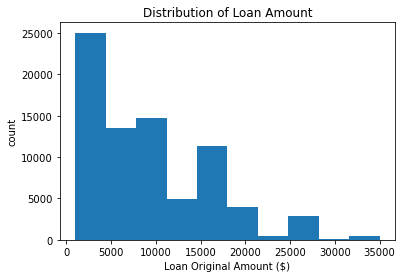

In [89]:
# A simple histogram plot of the variable LoanOriginalAmount
plt.hist(data=df_loan, x='LoanOriginalAmount');
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('count');
plt.title('Distribution of Loan Amount');

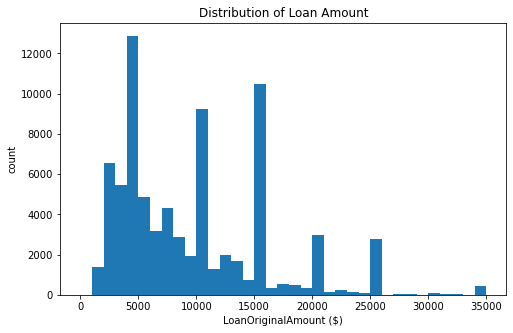

In [91]:
# plotting with a standard-scaled plot
binsize = 1000
bins = np.arange(0, df_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()


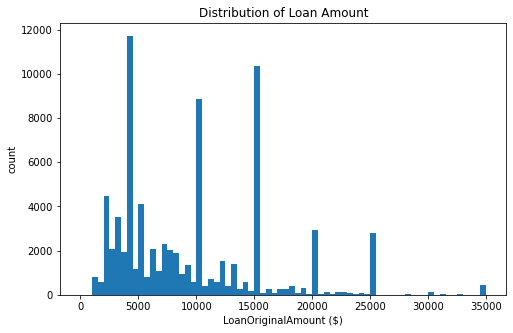

In [92]:
# investigating further on an even smaller bin size
binsize = 500
bins = np.arange(0, df_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

### observation

Around 5k, 10k, 15k, 20k, 25k, and 35k are where the peak values are (in dollars). This indicates that loans are disbursed in multiples of $5,000 and in rounded numbers.
I have seen that the majority of loans are disbursed at 4,000, 10,000, and 15,000. The distribution is hence trimodal.

### Question 2

### visualization

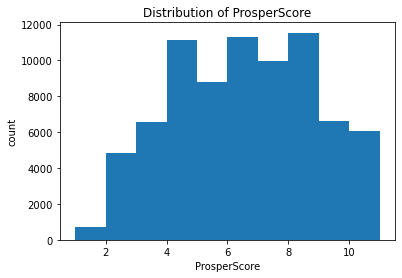

In [93]:
# A simple histogram plot of the variable Prosperscore
plt.hist(data=df_loan, x='ProsperScore');
plt.xlabel('ProsperScore');
plt.ylabel('count');
plt.title('Distribution of ProsperScore');

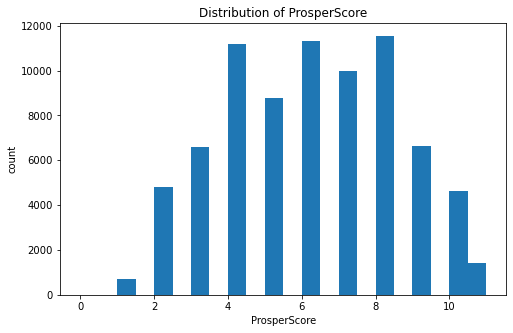

In [98]:
# plotting with a standard-scaled plot
binsize = 0.5
bins = np.arange(0, df_loan['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'ProsperScore', bins = bins)
plt.xlabel('ProsperScore')
plt.ylabel('count')
plt.title('Distribution of ProsperScore');
plt.show()

### observation

I observed that the most prosper score are 4,6,8 with the highest being properscore 8

Prosper score which assesses risk levels for loan is roughly trimodal at 4, 6, 8 risk levels
It is worthy to keep in mind that The best risk score to receive a high loan Amount is 10/11

### Question 3

Next up, the First predictor variable of interest: StatedMonthlyIncome

### visualization

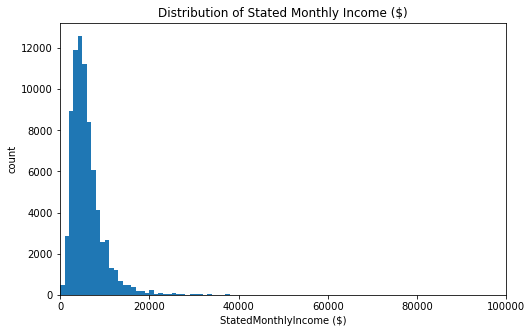

In [100]:
# starting with a standard-scaled plot
binsize = 1000
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.xlim(0, 100000)
plt.show()

C:\Users\USER\anaconda3\envs\main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


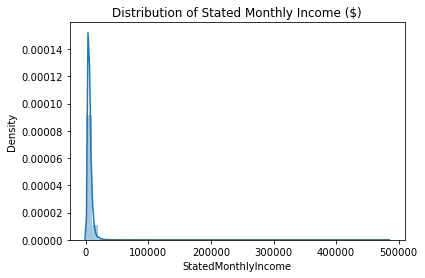

In [102]:
# plotting with seaborns distplot
sb.distplot(df_loan.StatedMonthlyIncome);
plt.title('Distribution of Stated Monthly Income ($)');

Based on the two plots above, There is a long tail distribution. This could indicate the presence of outliers which I'll check with a box plot.

C:\Users\USER\anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


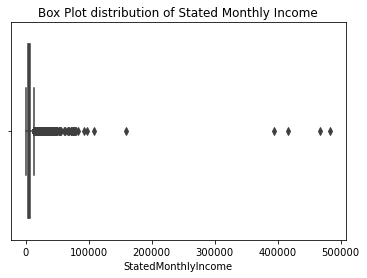

In [103]:
# Plotting a box plot with Stated monthly income variable to check for outliers
sb.boxplot(df_loan['StatedMonthlyIncome']);
plt.title('Box Plot distribution of Stated Monthly Income');

As seen above, The dots indicates the presence of outliers.
I'll go ahead to use the IQR method to detect outliers, then trim to remove those outliers

In [104]:
# Using IQR method to detect outliers
Q1 = df_loan['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_loan['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  #Data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  #Data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [105]:
shape = df_loan.shape
print('The shape before removing ouliers is: ', shape)

The shape before removing ouliers is:  (77543, 21)


In [106]:
# Transformation to remove outliers
# Trimming
df_loan = df_loan[df_loan['StatedMonthlyIncome'] < UpperLimit]

In [107]:
new_shape = df_loan.shape
print('The shape after removing ouliers is: ', new_shape)

The shape after removing ouliers is:  (74035, 21)


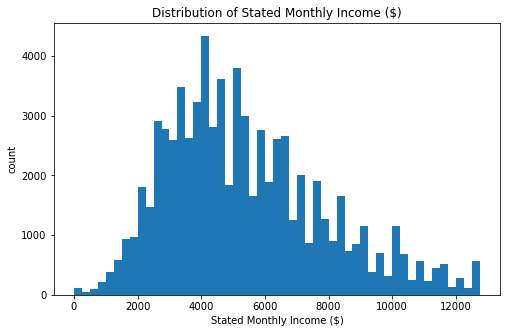

In [108]:
# Plotting an histogram with trimmed dataframe
binsize = 250
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

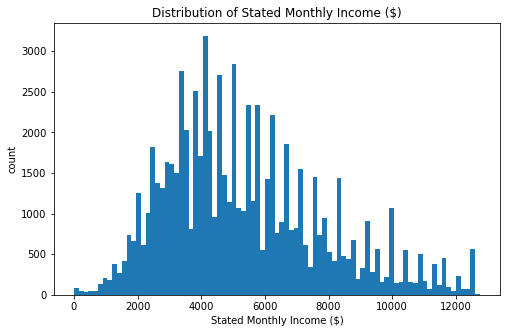

In [110]:
# investigating further with a reduced bin size
binsize = 150
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

### observation

The distribution of declared monthly income has a long tail, with many people earning at the low end. Trimmed and capped to exclude outliers, a large peak near the $4,000 (dollar) threshold is discovered.
It's intriguing to observe a brief peak at zero dollars as well. This is intended to represent jobless individuals.

 NOTE : I couldn't plot on a log scale because of the 0 dollars minimum stated monthly income

### Question 4

Which Income Ranges, are getting the most loan Amount?

### visualization

C:\Users\USER\anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


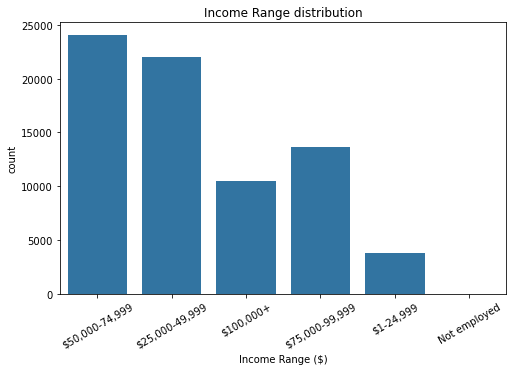

In [111]:
plt.figure(figsize=[8, 5])
sb.countplot(df_loan.IncomeRange, color=base_color);
plt.title('Income Range distribution');
plt.xlabel('Income Range ($)');
plt.xticks(rotation=30);

### observation

Most Loan Amount is given to those with incomes between $25,000 and $75,000 ($).

### Question 5

Next up, the Second Predictor variable of interest DebtToIncomeRatio

### visualization

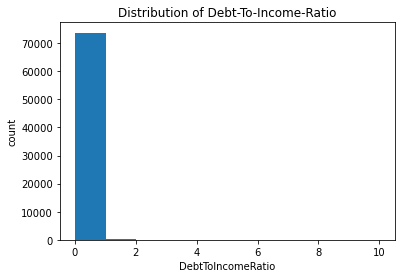

In [112]:
# A simple histogram plot of the variable 
plt.hist(data=df_loan, x='DebtToIncomeRatio');
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of Debt-To-Income-Ratio');

the chart is skewed to the left which indicates presense of outliers

C:\Users\USER\anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


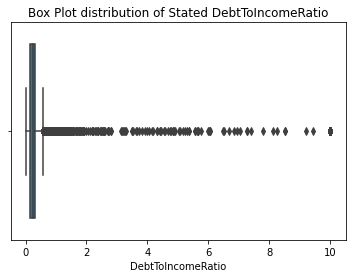

In [114]:
# Plotting a box plot with Stated DebtToIncomeRatio variable to check for outliers
sb.boxplot(df_loan['DebtToIncomeRatio']);
plt.title('Box Plot distribution of Stated DebtToIncomeRatio');

In [115]:
# Using IQR method to detect outliers
Q1 = df_loan['DebtToIncomeRatio'].quantile(0.25)
Q3 = df_loan['DebtToIncomeRatio'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  #Data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  #Data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-0.07999999999999999 0.56


In [116]:
shape = df_loan.shape
print('The shape before removing ouliers is: ', shape)

The shape before removing ouliers is:  (74035, 21)


In [117]:
# Transformation to remove outliers
# Trimming
df_loan = df_loan[df_loan['DebtToIncomeRatio'] < UpperLimit]

In [118]:
new_shape = df_loan.shape
print('The shape after removing ouliers is: ', new_shape)

The shape after removing ouliers is:  (71965, 21)


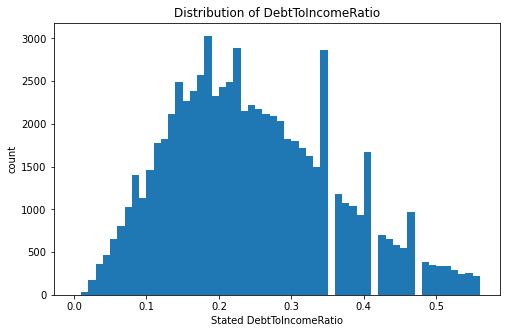

In [130]:
# Plotting an histogram with trimmed dataframe
binsize = 0.01
bins = np.arange(0, df_loan['DebtToIncomeRatio'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins=bins)
plt.xlabel('Stated DebtToIncomeRatio')
plt.ylabel('count')
plt.title('Distribution of DebtToIncomeRatio');
plt.show()

### observation

Lenders typically prefer a debt-to-income ratio of 0.36 (36%) or less for ordinary loans. 

As can be seen from the plot above, there are noticeable frequency spikes around 0.2, 0.23 and 0.36. This suggests that the majority of borrowers have debt-to-income ratios that are below 0.3.
Note: outliers were also removed

### Question 6

Next, i'll check the distribution of Employee Status duration

### visualization

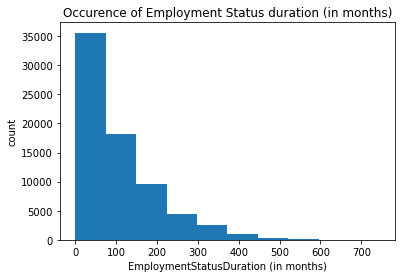

In [131]:
# A simple histogram plot of the variable 
plt.hist(data=df_loan, x='EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration (in months)');
plt.ylabel('count');
plt.title('Occurence of Employment Status duration (in months)');

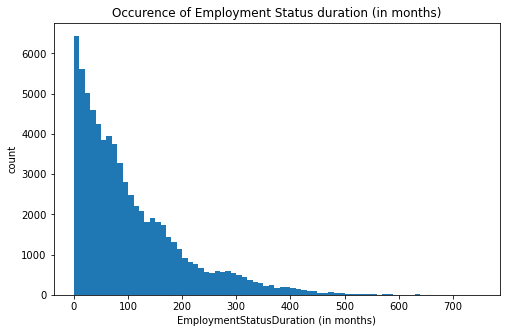

In [133]:
# plotting with a standard-scaled plot
binsize = 10
bins = np.arange(0, df_loan['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('EmploymentStatusDuration (in months)');
plt.ylabel('count');
plt.title('Occurence of Employment Status duration (in months)');
plt.show()


### observation

Employee Status duration is depicted in the graph above.

### Question 7

Next, I'll like to check out Loan term

### visualization

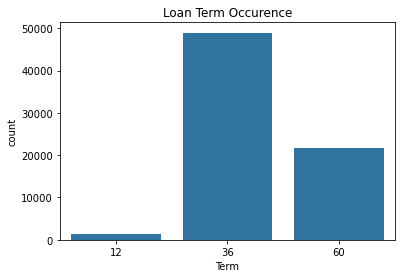

In [134]:
sb.countplot(data=df_loan, x='Term', color=base_color)
plt.title('Loan Term Occurence');

### observation

This demonstrates that the majority of loans have a 36-month term (3 years)

### Question 8

Next up, another variable of interest MonthlyLoanPayment

### visualization

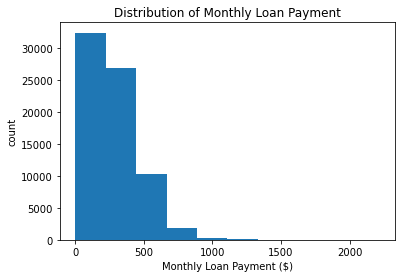

In [135]:
# A simple histogram plot of the variable 
plt.hist(data=df_loan, x='MonthlyLoanPayment');
plt.xlabel('Monthly Loan Payment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');

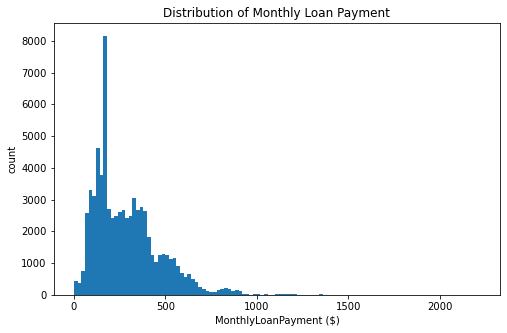

In [136]:
# plotting with a standard-scaled plot
binsize = 20
bins = np.arange(0, df_loan['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');
plt.show()


### observation

 The distribution is unimodal, with many of the loaners making monthly payments of about $200

 It's noteworthy to note that some customers do not pay on a monthly basis.
 
 The majority of the monthly loan payments are less than $ 500.

### Question 9

I'll move on to other variables in the dataset.
#### Ordinal Variables

### visualization

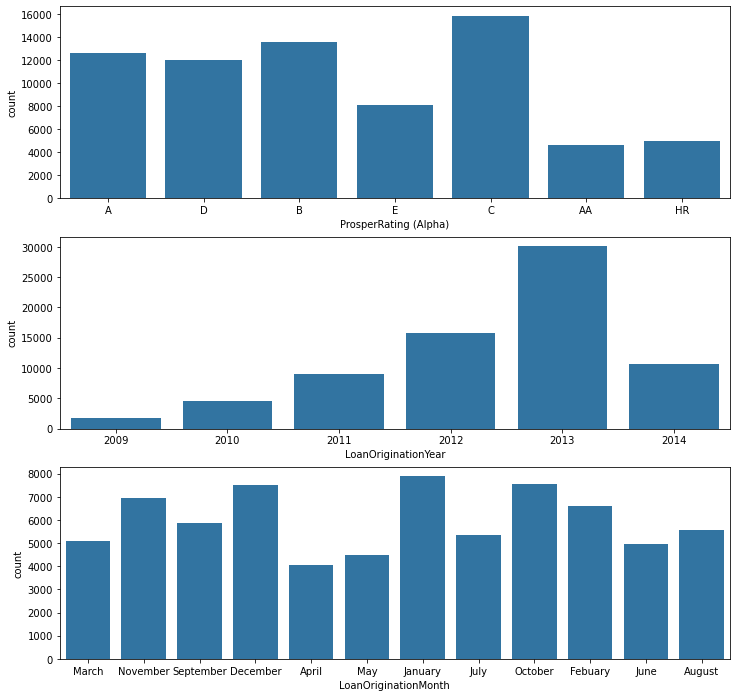

In [138]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

base_color = sb.color_palette()[0]

sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = base_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'LoanOriginationYear', color = base_color, ax = ax[1])
sb.countplot(data = df_loan, x = 'LoanOriginationMonth', color = base_color, ax = ax[2])

plt.show()

### observation

The majority of Prosper ratings are C, which denotes an average degree of risk.

The majority of loans originated in 2013 and were often made in the months of October, November, and December or at the start of the year (January, Febuary)

based on what I've seen in the Loan Origination plot. I want to know if the likelihood of receiving a large loan amount in 2013 is higher than it is in past years. The average loan amount given to a person each year is something I'm curious about. In the part on the bivariate plot, I'll examine this.

### Question 10

I'll move on to other variables in the dataset.
#### Nominal Variables

### visualization

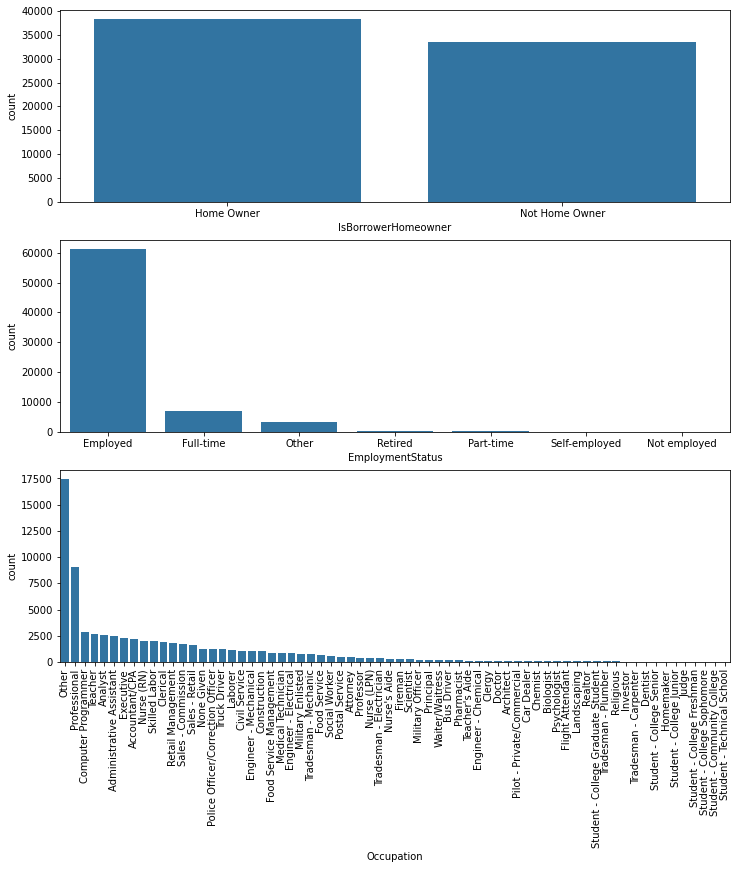

In [139]:
# let's plot all three together to get an idea of each variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

base_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', order = df_loan['IsBorrowerHomeowner'].value_counts().index, 
             color = base_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'EmploymentStatus', order = df_loan['EmploymentStatus'].value_counts().index,
             color = base_color, ax = ax[1])
sb.countplot(data = df_loan, x = 'Occupation', order = df_loan['Occupation'].value_counts().index, 
             color = base_color, ax = ax[2])
plt.xticks(rotation=90);

plt.show()

### observation

About 60% of the borrowers are home owners.

Most Borrowers Employment Status are Employed or Full-time

The top Borrower Occupation are Professional, Executives, Computer Programmer, Teacher, Analyst and Administrative Assistant.

## Observations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable Loan Original Amount had a range of $1,000 to $35,000. Plotting the data revealed that it was trimodal, with peaks just below 5,000 and at 10,000 and 15,000. Additionally, there were no uncommon spots, therefore I didn't feel the need to make any changes.

also people with prosper rating of C will get more loans.

Over the years, the Loan Origination increased progressively before experiencing a jump in 2013. then retreated the next year. In 2013, more loans were made available.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?



Outliers were discovered while studying the indicated monthly income variable. These numbers appeared to be extremely improbable to constitute a monthly income because they were disproportionately remote from other data points. These spots were trimmed away for safety in order to proceed. I took notice of the dataframe's form both before and after outliers were removed.
additionally,

outliers were seen in the column for the debt-to-income ratio, which I alsotrimmed


The figure was scaled to focus on the range of 0.1 to 1.0 when analyzing the Debt to Income Ratio in order to draw some interesting conclusions.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In this section, I'll be investigating relationships between pairs of variables previously introduced.



### Question 11

To start off with, I want to look at the pairwise correlations present between features in the data.

### visualization

In [140]:
# placing numeric variables together and categorical together
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'EmploymentStatusDuration', 'MonthlyLoanPayment']
categoric_vars = ['ProsperScore', 'ProsperRating (Alpha)','EmploymentStatus', 'IsBorrowerHomeowner', 'LoanStatus']

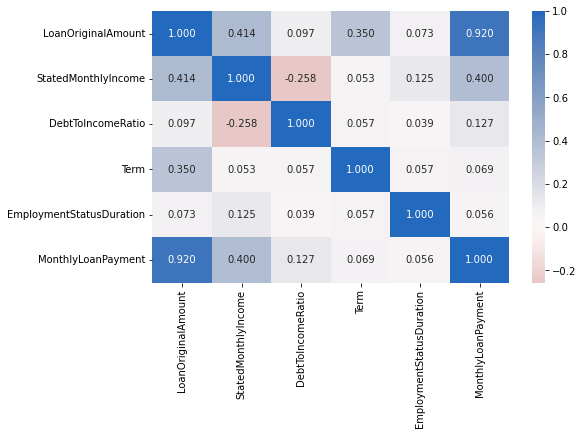

In [141]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### observation

From the heat map/Correlation plot, one can see that there is a strong relationship between Monthly Loan Payment and Loan Original Amount(0.919).
There's a weak positive relationship/correlation between Stated Monthly Income and Loan Original Amount (0.414)
There's a weak positive relationship/correlation between Term and Loan Original Amount (0.352)
There's a weak positive relationship/correlation between Term and Monthly Loan Payment (0.396)

### Question 12

I want to look at correlations using scatter plots with different variables

### visualization

df_clean.shape= (71965, 21)
df_clean.shape= (71965, 21)


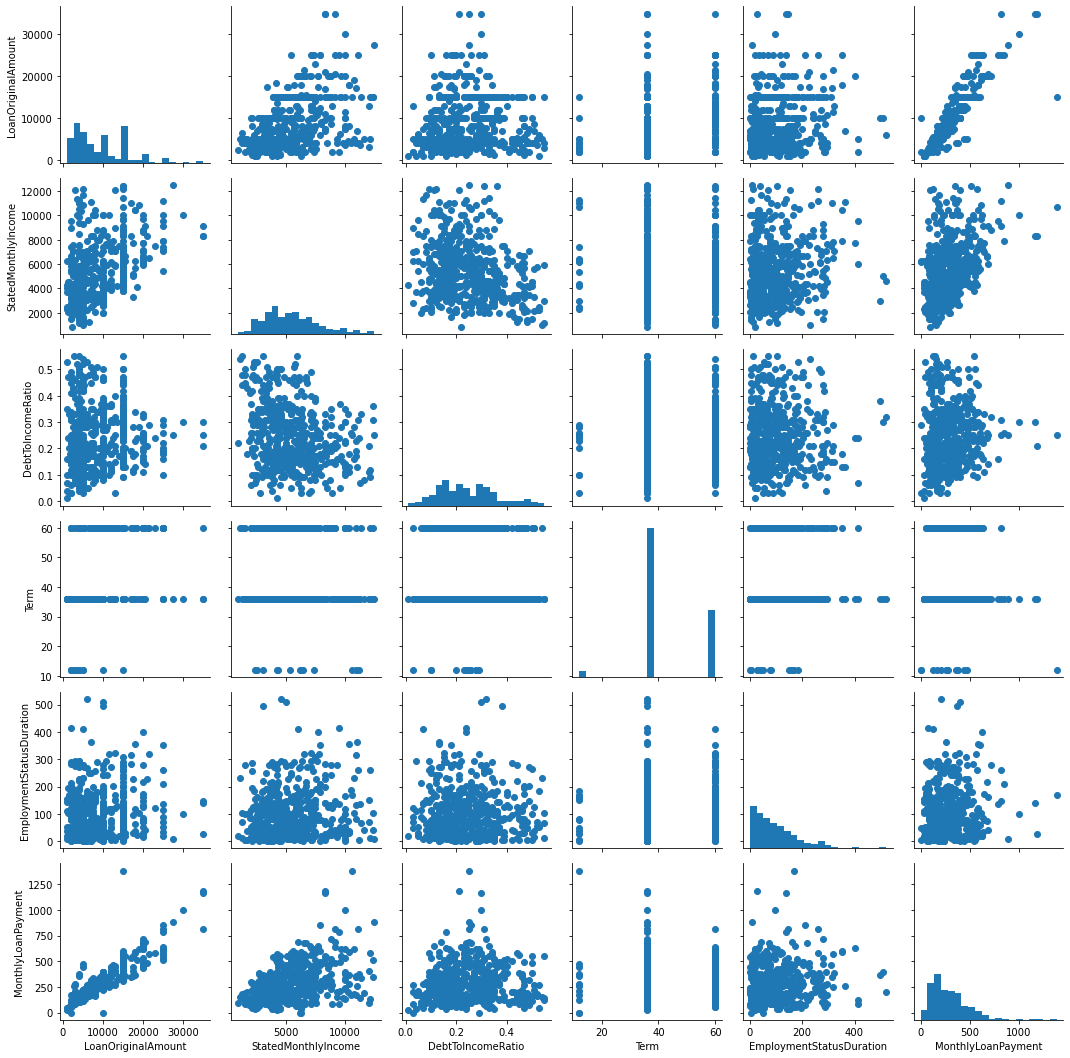

In [142]:
# plot matrix: sample 500 Loan data so that plots are clearer and they render faster
print("df_clean.shape=",df_loan.shape)
df_clean_samp = df_loan.sample(n=500, replace = False)
print("df_clean.shape=",df_loan.shape)

g = sb.PairGrid(data = df_clean_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### observation

LoanOriginalAmount and MonthlyLoanPayment have a good correlation as expected (i.e represent a very strong relationship). It is not surprising because a borrower is more likely to be given a greater loan amount if he agrees to make a high monthly loan payment. A favorable correlation exists between LoanOriginalAmount and StatedMonthlyIncome as well.

### Question 13

Let's move on to looking at how Loan Original Amount and StatedMonthlyIncome correlate with the categorical variables.

### visualization

C:\Users\USER\anaconda3\envs\main\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 864x1080 with 0 Axes>

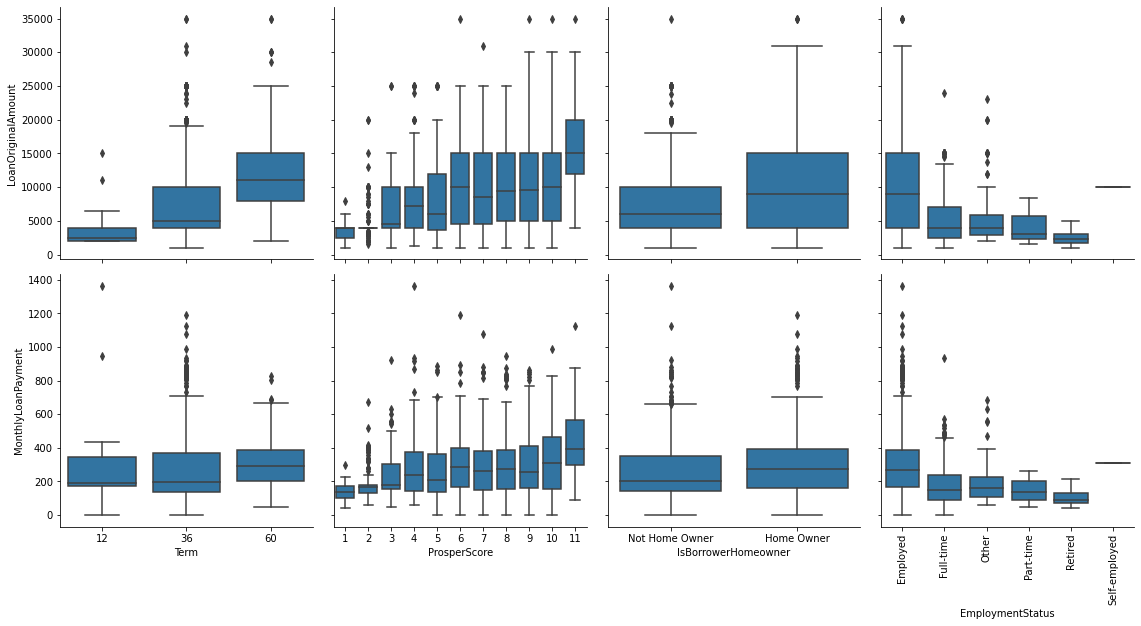

In [143]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


df_clean_samp = df_loan.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color);

plt.figure(figsize = [12, 15])
g = sb.PairGrid(data = df_clean_samp, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['Term','ProsperScore', 'IsBorrowerHomeowner',
                                                                                            'EmploymentStatus'],
                size= 4, aspect = 1.0);

g.map(boxgrid);
plt.xticks(rotation=90);

### observation

It's interesting to see that the two important numeric variables and the categorical variables have a positive association.

The highest loan amount is given to borrowers who meet the criteria (longer loan term, top Prosper score/low risk, home ownership, and employment).

The top Prosper Score (low risk) borrowers who are employed or have a mortgage typically make greater monthly loan payments.

### Question 14

Finally, let's look at relationships between the three categorical features.

### visualization

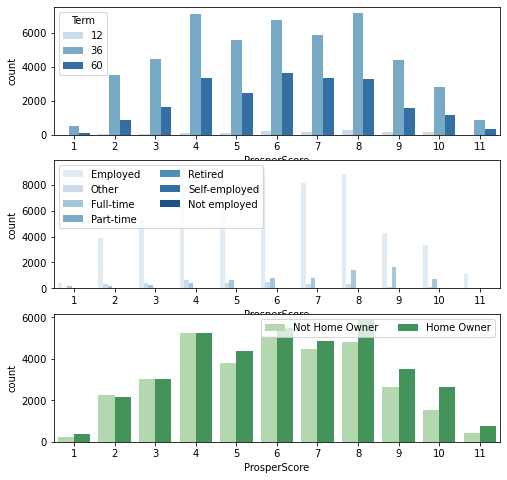

In [144]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### observation

the employed have access to more loans, also the home owners with prosper score 9, 10, 11 have access to mer loans

### Question 15

Next, I'll like to see the relationship/correlation between two quantitative variable of interest, Monthly Loan Payment and Loan Original Amount

### visualization

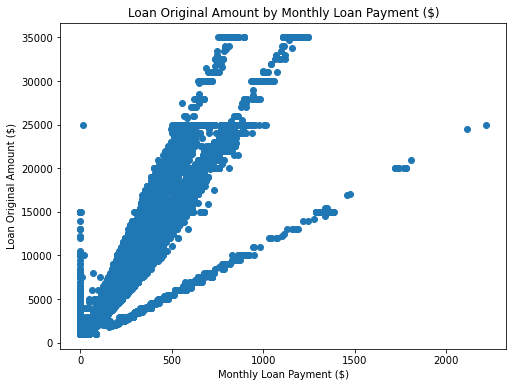

In [145]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment

plt.figure(figsize = [8, 6])
plt.scatter(data = df_loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount by Monthly Loan Payment ($)')
plt.show()

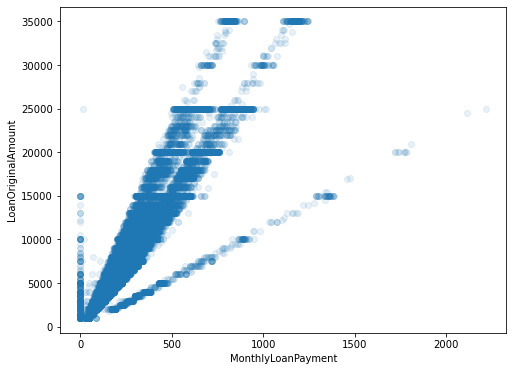

In [146]:
# intoducing jitter and transparency to help with overplotting
plt.figure(figsize = [8, 6]);
sb.regplot(data=df_loan, x='MonthlyLoanPayment', y='LoanOriginalAmount',fit_reg=False, x_jitter=0.3, scatter_kws=({'alpha':1/10}));

### observation

From the plot above, there is a strong positive relationship between Loan Amount and Monthly Loan Payment. This is likely because, monthly loan payment is decided or calculated using the Loan amount

I see that the plot seems to be split into three lines, could this be because of a categorical variable, I'll explore that further in multivariate plot section

### Question 16

Next, Checking relationship between DebtToIncomeRatio and LoanOriginalAmount

### visualization

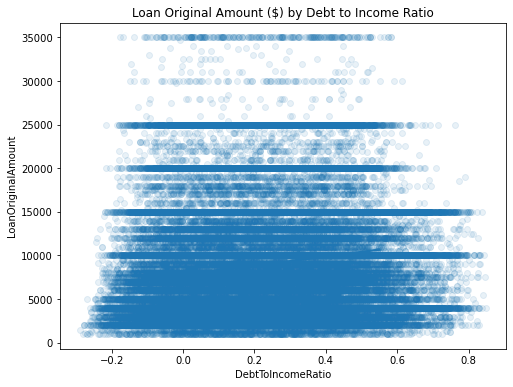

In [147]:
plt.figure(figsize=[8,6]);
sb.regplot(data=df_loan, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.title('Loan Original Amount ($) by Debt to Income Ratio');

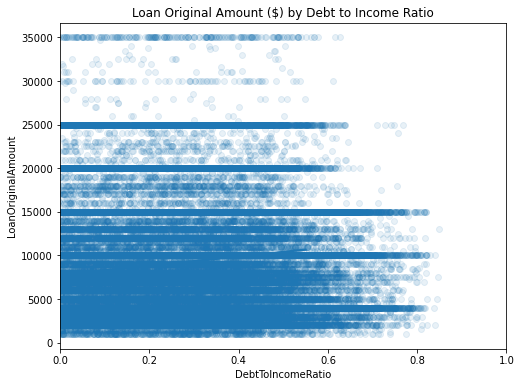

In [148]:
plt.figure(figsize=[8,6]);
sb.regplot(data=df_loan, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.xlim(0,1);
plt.title('Loan Original Amount ($) by Debt to Income Ratio');

### observation

A low debt-to-income ratio, in my estimation, will raise the loan original amount. 

This estimate is demonstrated to be accurate by the plot up top. The dots grouped in the upper left corner demonstrate that a borrower is more likely to receive either a high Loan Amount or a low Loan Amount when they have a relatively low Debt to Income Ratio( 1). 

However, if the borrower's debt to income ratio is excessive, the loan amount will undoubtedly be reduced.

### Question 17

Next, Checking relationship between DebtToIncomeRatio and LoanOriginalAmount

### visualization

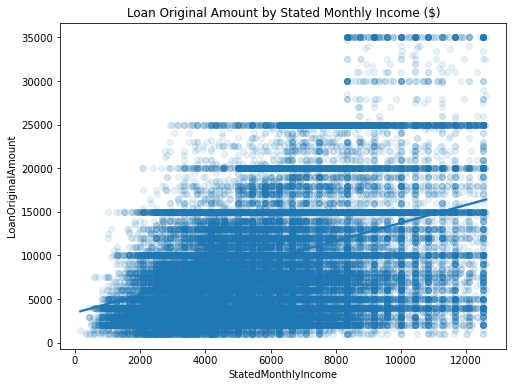

In [150]:
plt.figure(figsize=[8,6]);
sb.regplot(data=df_loan, x='StatedMonthlyIncome', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.title('Loan Original Amount by Stated Monthly Income ($)');

### observation

My earlier assumptions is that the higher the Monthly Income the higher the Loan Amount. This assumption is proven to be true from the following plot.

When a borrower has relatively low Monthly Income (<8,000) the probabilities of getting low and high Loan Amount are similar.

However, when the borrower’s Monthly Income is high (>8,000), he/she is more likely to get a High Loan Amount

### Question 18

Next, I'm interested in which Occupation is likely to be given a high Loan Amount

### visualization

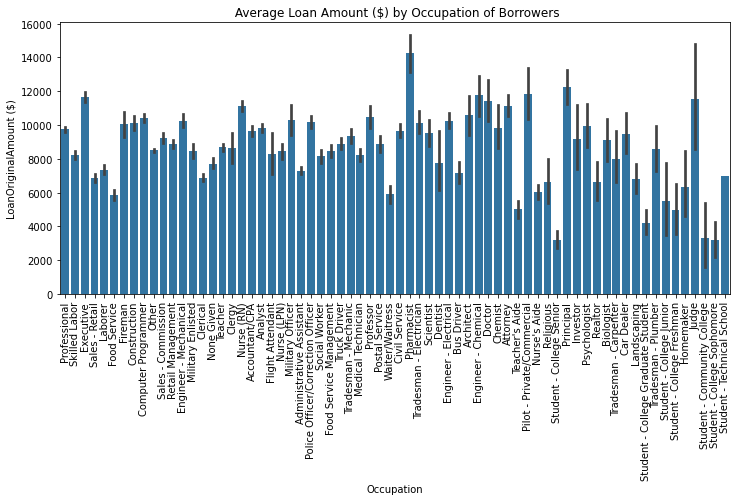

In [151]:
plt.figure(figsize=[12,5])
base_color = sb.color_palette()[0]
sb.barplot(data=df_loan, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount ($)')
plt.title(' Average Loan Amount ($) by Occupation of Borrowers')
plt.xticks(rotation=90);

### observation

The Top Occupation with the highest Loan Amount are Judge, Pharmacist and Doctor. This could be because these are the highest paying jobs.

### Question 19

Next, I want to see how prosper score affects Loan Amount

### visualization

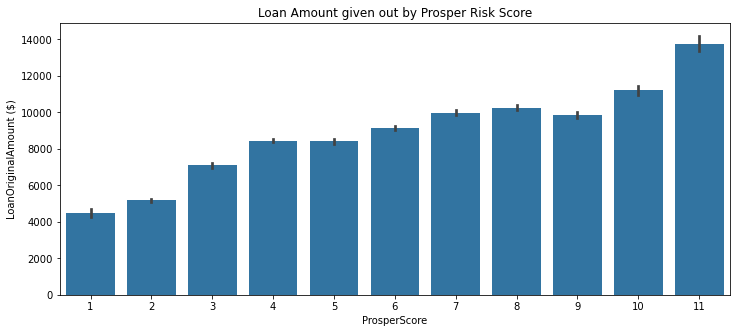

In [152]:
plt.figure(figsize=[12,5])
base_color = sb.color_palette()[0]
sb.barplot(data=df_loan, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount ($)');
plt.title('Loan Amount given out by Prosper Risk Score');

### observation

As seen from plot above, generally the Loan Amount increases as the Prosper risk reduces(or Prosper number increases). This shows that low/no risk borrowers have a higher chance of getting larger Loan Amounts.

### Question 20

Next, I'll like to see if having a home will aid in getting a highloan.

### visualization

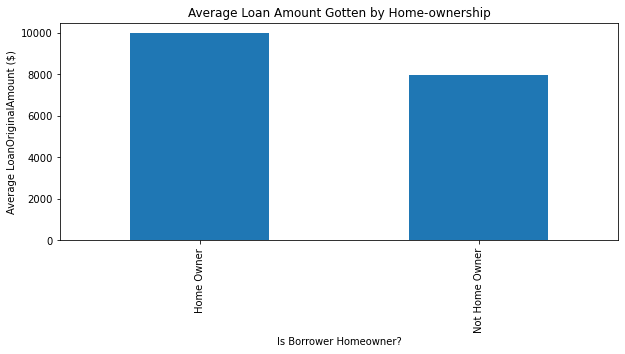

In [153]:
#Plot average Loan Amount by Home-ownership
data = df_loan.groupby('IsBorrowerHomeowner').mean()['LoanOriginalAmount']
#Create a plot as the variable "ax"
ax = data.plot(kind='bar',
               title="Average Loan Amount Gotten by Home-ownership",
               figsize = (10,4), color=base_color)
#Set axis labels for the "ax" plot
ax.set(xlabel='Is Borrower Homeowner?',
       ylabel='Average LoanOriginalAmount ($)');

### observation

This plot shows that Borrowers with a home are getting more loans combined that Borrowers without one.

## observations

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Monthly Income and Loan Amount have a favorable relationship. I found that the chances of receiving a low or high loan amount are somewhat equal for borrowers with a low monthly income. The loan amount is higher when the monthly income is higher, though.

It's an intriguing finding that the Loan Amount reduces when the Debt-To-Income Ratio rises. This is because lenders tend to lend less money to this group of people since they view borrowers with high debt-to-income ratios as more risky.

Additionally, there was an intriguing connection between the categorical traits and the loan amount. Longer loan terms, low risk (high Prosper score), home ownership, and gainful employment are connected with more loans for borrowers.

A positive linear relationship was observed was observed when Loan Amount was plotted against Monthly Loan Payment. The scatter plot showed 3 pair of lines. This will have to be explored/investigated further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I saw that borrowers who had a home and were in successful jobs paid the most in monthly loan payments.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is see if/how my variables are Strengthened by other variables

### Question 21

I observed a positive correlation earlier between Loan Amount and Stated Monthly income, but observed three lines. 

I'll like to explore that further with a plot to check if a third variable is at play.

### visualization

C:\Users\USER\anaconda3\envs\main\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


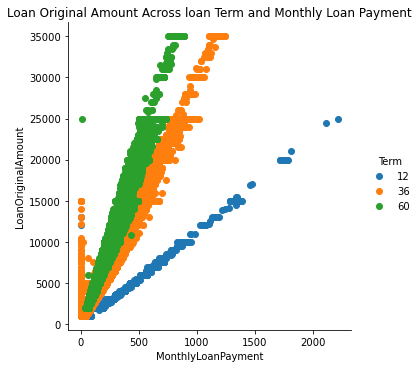

In [154]:
g = sb.FacetGrid(data = df_loan, hue = 'Term', size = 5);
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');
plt.title('Loan Original Amount Across loan Term and Monthly Loan Payment')
g.add_legend();

### observation

From the plot, as earlier assumed, a third variable, Loan Term is involved. This plot above shows that borrowers with longer Loan Term 36, 60 months receives higher Loan amount.
For a maximum Loan Amount of 35,000 the Loan Term is longer,(36 or 60 months)

Also, I observed that For a longer Loan Term the scheduled monthly payment is less than that of small term (12months).

### Question 22

Next, I want to understand how Loan Term and Prosper score effects the Loan Amount to be given

### visualization

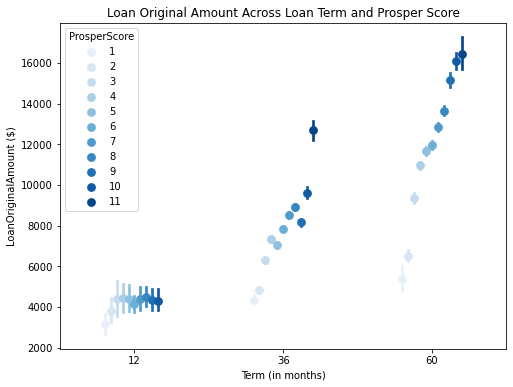

In [155]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Term (in months)')
plt.show();

### observation

This plot shows that if the Loan term(in months) is higher say 60 months and the Prosper score is higher (less risk) say 10 or 11, the borrower is more likely to get a large Loan Amount.

### Question 23

Next, i'd like to see if being a Home Owner and having a good risk score will effect the Loan Amount

### visualization

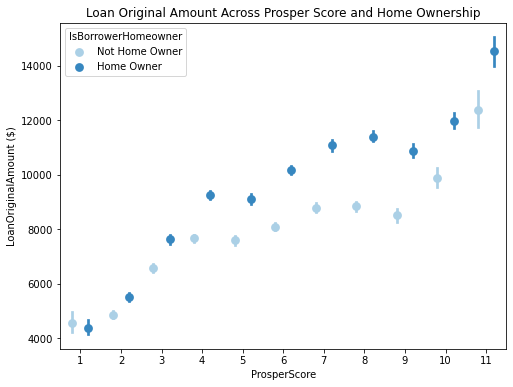

In [156]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('ProsperScore')
plt.show();

### observation

The plot above shows that home-owners with a good Prosper score(low risk) is likely to get a Large Loan Amount.

## observations

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between monthly loan payment and loan amount was made stronger by loan term. When granting loans, loan term is a crucial consideration. Longer terms are assigned to larger loan amounts.

I learned that even though Loan Term is taken into consideration when deciding how much money would be borrowed. Additionally, the Prosper score has an impact (risk score). In other words, the larger the loan amount to be granted, the longer the loan term, and the higher the risk score (Prosper Score).

This might be the result of lenders being more willing to extend credit to borrowers that they don't view as default risks and offering a lengthy

### Were there any interesting or surprising interactions between features?

There wasn't any surprising interactions between features here. 

But, I found it interesting that Loan Term seemed to have such an effect in the scatter plot.

That for each loan Term one could also go ahead to create subplots to show how it affects loan amount.

## Conclusions

procedures followed during data exploration:

1. I began by importing the data and looking at the data dictionary to understand the variables.
2. Then, during the data wrangling phase, I carried out some early analysis and cleansing.
3. I then generated a subset of the dataframe, which contained the variables I was most interested in examining.
4. I began by exploring the distribution of my primary feature, Loan Original Amount, as well as the predictor variables using the Univariate charting method. Before moving on to the next, I gave these variables a thorough introduction in the section on univariate plotting.
5. Then, in the bivariate part, I plotted scatterplot subplots of the variables to further investigate the associations between the numerical variables using a typical heat map.
6. I created a matrix plot grid to observe how the categorical variables affected the numerical variables, especially the loan amount. This is where things became really fascinating for me.

7. I did more research and used individual plots to demonstrate correlations between the primary variable and predictor variables (Stated Monthly Income, Debt-To-Income-Ratio). I choose to display with bar plots which category features (Home Owners, Occupation, Prosper score 10/11) received the largest loan amounts.

8. Investigating the multivariate plotting to see if there were any factors that would enhance some of the relationships found. I found some, including Loan Term and Prosper Risk Score.



A summary of my main findings

1. In This exploratory analysis I discovered that more loans were issued in the year 2013 and also during January, Febuary and Suffix -Ember Months. I discovered that for a Large Loan the Loan Term is 36 or 60 months.

2. To be granted access to these large loans I need to have a good Debt-To-Income-Ratio( preferably 0.50 or lesser) dependent on Loan Type.

3. To get a large loan as a borrower, I need to get have an Occupation that pays a Large Monthly Income, To show ability to pay back. Or, at least have a Large Monthly Income

4. Also, I need to have a good prosper Risk Score (10/11) and possibly own a Home as well ( to show stability or for Collateral).